In [4]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
from matplotlib import pyplot as plt
import ast

In [6]:
first_base = pd.read_csv('atbats_first_solo.csv')

first_base

,Unnamed: 0,Batter_name,Rbi_outcome,Rbi_stay,Success_steal,Success_stay,Outs,homeScore,awayScore,inning,isTopInning,Isout,Current_outs,dict_players,Date
0,0,Adrián González,0,0,0.3,0.00,2,3,2,6,True,True,1,"{'init': 0, 408307: 1}",2014-05-07
1,1,Prince Fielder,0,0,0.3,0.05,3,2,5,8,False,True,1,"{'init': 0, 462101: 1}",2014-05-11
2,2,Alexei Ramirez,0,0,0.3,0.05,3,1,1,4,True,True,1,"{'init': 0, 276055: 1}",2014-05-12
3,3,Yasiel Puig,0,0,0.3,0.05,2,6,3,7,False,True,1,"{'init': 0, 408210: 1}",2014-05-12
4,4,Adrián González,0,0,0.3,0.00,3,4,3,4,False,True,1,"{'init': 0, 434670: 1}",2014-05-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308432,308432,Ramón Laureano,0,0,0.3,0.00,2,7,8,9,False,True,1,"{'init': 0, 642201: 1}",2024-09-30
308433,308433,Francisco Lindor,1,1,0.3,0.15,1,7,8,9,True,False,1,"{'init': 0, 516782: 1}",2024-09-30
308434,308434,Matt Olson,0,0,0.3,0.10,3,0,0,1,False,True,1,"{'init': 0, 542303: 1}",2024-09-30
308435,308435,Sean Murphy,0,0,0.3,0.15,1,1,0,2,False,False,1,"{'init': 0, 570482: 1}",2024-09-30


In [7]:
first_base['runner_id'] = first_base['dict_players'].apply(lambda x: list(ast.literal_eval(x).keys())[-1])

In [8]:
stolen_df = pd.read_csv('stolen_df_2.csv')
stolen_df

,Result,Exchange,Arm_Strength,Sprint,Date,runner_id,runner_name,Result_1,Exchange_1,Arm_Strength_1,...,Arm_Strength_3,Sprint_3,Result_4,Exchange_4,Arm_Strength_4,Sprint_4,Result_5,Exchange_5,Arm_Strength_5,Sprint_5
0,1,0.74,84.9,28.0,2021-04-01,545341,Randal Grichuk,1,0.74,84.9,...,84.9,27.0,0,0.74,84.9,27.7,0,0.74,84.9,25.0
1,0,0.75,81.4,27.3,2021-04-01,643565,Mike Tauchman,0,0.75,81.4,...,81.4,NaN,1,0.75,81.4,30.5,1,0.75,81.4,NaN
2,0,0.75,81.4,27.3,2021-04-01,643565,Mike Tauchman,0,0.75,81.4,...,81.4,NaN,1,0.75,81.4,30.5,1,0.75,81.4,NaN
3,0,0.73,79.0,27.9,2020-09-30,666185,Dylan Carlson,0,0.73,79.0,...,79.0,27.6,1,0.73,79.0,27.6,0,0.73,79.0,28.6
4,1,0.7,83.2,27.8,2020-09-30,502054,Tommy Pham,1,0.70,83.2,...,83.2,NaN,1,0.70,83.2,NaN,1,0.70,83.2,27.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37567,1,0.65,82.7,27.6,2016-04-09,500871,Eduardo Escobar,1,0.65,82.7,...,82.7,25.2,0,0.65,82.7,NaN,1,0.65,82.7,NaN
37568,1,0.75,80.1,28.4,2016-04-09,514888,Jose Altuve,1,0.75,80.1,...,80.1,26.3,1,0.75,80.1,27.9,0,0.75,80.1,26.3
37569,1,0.75,80.1,28.0,2016-04-09,543807,George Springer,1,0.75,80.1,...,80.1,26.3,1,0.75,80.1,27.9,0,0.75,80.1,26.3
37570,1,0.65,82.7,27.1,2016-04-08,572821,Brian Dozier,1,0.65,82.7,...,82.7,NaN,1,0.65,82.7,27.3,1,0.65,82.7,NaN


In [9]:
stolen_df.sort_values(by='Date')

,Result,Exchange,Arm_Strength,Sprint,Date,runner_id,runner_name,Result_1,Exchange_1,Arm_Strength_1,...,Arm_Strength_3,Sprint_3,Result_4,Exchange_4,Arm_Strength_4,Sprint_4,Result_5,Exchange_5,Arm_Strength_5,Sprint_5
37571,1,0.67,81.2,28.0,2016-04-02,485567,Ezequiel Carrera,1,0.67,81.2,...,81.2,NaN,1,0.67,81.2,NaN,0,0.67,81.2,NaN
32330,1,0.67,81.2,28.0,2016-04-02,485567,Ezequiel Carrera,1,0.67,81.2,...,81.2,NaN,1,0.67,81.2,NaN,0,0.67,81.2,NaN
26536,1,0.67,81.2,28.0,2016-04-02,485567,Ezequiel Carrera,1,0.67,81.2,...,81.2,NaN,1,0.67,81.2,NaN,0,0.67,81.2,NaN
32329,1,0.65,82.7,27.1,2016-04-08,572821,Brian Dozier,1,0.65,82.7,...,82.7,NaN,1,0.65,82.7,27.3,1,0.65,82.7,NaN
37570,1,0.65,82.7,27.1,2016-04-08,572821,Brian Dozier,1,0.65,82.7,...,82.7,NaN,1,0.65,82.7,27.3,1,0.65,82.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26541,1,0.78,84.6,26.6,2023-09-30,666971,Lourdes Gurriel Jr.,1,0.69,85.4,...,85.4,NaN,1,0.69,85.4,NaN,1,0.69,85.4,29.6
26540,1,0.62,83.5,26.0,2023-09-30,663656,Kyle Tucker,1,0.62,83.5,...,83.5,29.3,1,0.62,83.5,28.5,0,0.62,83.5,27.7
26539,1,0.69,78.8,29.3,2023-09-30,686668,Brenton Doyle,1,0.60,79.5,...,79.5,29.6,1,0.60,79.5,27.1,0,0.60,79.5,29.2
26537,1,0.72,83.7,29.4,2023-09-30,665923,Esteury Ruiz,1,0.72,83.7,...,83.7,NaN,1,0.72,83.7,28.1,1,0.72,83.7,27.2


In [10]:
data_exp = {
    "Runners": ['0', "1", "2", "1,2", "3", "1,3", "2,3", "1,2,3"],
    "0 Outs": [0.461, 0.831, 1.068, 1.373, 1.426, 1.798, 1.920, 2.282],
    "1 Outs": [0.243, 0.489, 0.644, 0.908, 0.865, 1.140, 1.352, 1.520],
    "2 Outs": [0.095, 0.214, 0.305, 0.343, 0.413, 0.471, 0.570, 0.736],
}


exp_run_base = pd.DataFrame(data_exp)
exp_run_base

,Runners,0 Outs,1 Outs,2 Outs
0,0,0.461,0.243,0.095
1,1,0.831,0.489,0.214
2,2,1.068,0.644,0.305
3,"1,2",1.373,0.908,0.343
4,3,1.426,0.865,0.413
5,"1,3",1.798,1.140,0.471
6,"2,3",1.920,1.352,0.570
7,"1,2,3",2.282,1.520,0.736


In [11]:
stolen_subset = stolen_df[['Result', 'Date', 'runner_id']]

final_df = pd.merge(stolen_subset, first_base, on=['Date', 'runner_id'], how='inner')


In [29]:

final_df['Rbi_steal_unique'] = final_df.apply(lambda x: 1 if x['Rbi_outcome'] == 1 and x['Rbi_stay'] == 0 else 0, axis=1)
final_df.sort_values(by='Date')

,index,Result,Date,runner_id,Unnamed: 0,Batter_name,Rbi_outcome,Rbi_stay,Success_steal,Success_stay,...,dict_players,Past_Steal_Success,Simulated_out,Diff,Diff_transform,Utility_steal,Utility_caught,Utility_stay,Expected_Utils,Rbi_steal_unique
598,53149,1,2016-04-27,456488,46391,Kurt Suzuki,0,0,0.3,0.10,...,"{'init': 0, 456488: 1}",0.2,2,-1,0.800737,0.05190,-0.4392,0.0644,-7.171619,0
596,53150,1,2016-04-27,456488,46391,Kurt Suzuki,0,0,0.3,0.10,...,"{'init': 0, 456488: 1}",0.2,2,-1,0.800737,0.05190,-0.4392,0.0644,-7.171619,0
597,53151,1,2016-04-27,456488,46391,Kurt Suzuki,0,0,0.3,0.10,...,"{'init': 0, 456488: 1}",0.2,2,-1,0.800737,0.05190,-0.4392,0.0644,-7.171619,0
39750,52906,1,2016-05-01,444876,47111,Mike Moustakas,0,0,0.3,0.15,...,"{'init': 0, 444876: 1}",1.0,2,2,0.411112,0.25950,-0.0000,0.0966,0.003710,0
39747,52908,1,2016-05-01,444876,47111,Mike Moustakas,0,0,0.3,0.15,...,"{'init': 0, 444876: 1}",1.0,2,2,0.411112,0.25950,-0.0000,0.0966,0.003710,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42811,22345,1,2023-09-30,669242,276257,Paul Goldschmidt,0,0,0.3,0.10,...,"{'init': 0, 669242: 1}",0.9,1,0,1.000000,0.38502,-0.0825,0.1068,0.195720,0
33929,22324,0,2023-09-30,682928,276233,Keibert Ruiz,1,0,0.3,0.00,...,"{'init': 0, 682928: 1}",0.7,2,1,0.800737,0.18165,-0.1647,0.0000,-0.394191,1
33944,22326,0,2023-09-30,682928,276233,Keibert Ruiz,1,0,0.3,0.00,...,"{'init': 0, 682928: 1}",0.7,2,1,0.800737,0.18165,-0.1647,0.0000,-0.394191,1
42091,22365,0,2023-09-30,669004,276379,Nelson Velázquez,0,0,0.3,0.05,...,"{'init': 0, 669004: 1}",1.0,2,0,1.000000,0.25950,-0.0000,0.0322,0.083619,0


In [13]:
succes_steal = []

for row, i in final_df.iterrows():
    
    runner_id = i['runner_id']
    
    results = stolen_df.loc[(stolen_df['Date'] < i['Date']) & (stolen_df['runner_id'] == runner_id)].tail(10)['Result'].tolist()
    
    if len(results) < 10:
        succes_steal.append(np.nan)
        
    else:
        succes_steal.append(sum(results) / 10)
        
final_df['Past_Steal_Success'] = succes_steal

final_df['Simulated_out'] = final_df['Current_outs'] + 1

In [14]:
def utility_steal(x):
    
    if x["Current_outs"] in [0, 1]:
        
        utils = x['Past_Steal_Success'] * x['Success_steal'] * (exp_run_base.loc[(exp_run_base['Runners'] == "3")][f'{x["Current_outs"]} Out'].tolist()[0])
                                                                
    else:
        utils = x['Past_Steal_Success'] * x['Success_steal'] * (exp_run_base.loc[(exp_run_base['Runners'] == "3")][f'{x["Current_outs"]} Outs'].tolist()[0])
          
    return utils
                                                                
def utility_caught(x):
    
    if x["Simulated_out"] in [1, 2]:
        
        utils = (1 - x['Past_Steal_Success']) * (exp_run_base.loc[(exp_run_base['Runners'] == "0")][f'{x["Simulated_out"]} Outs'].tolist()[0] - exp_run_base.loc[(exp_run_base['Runners'] == "2")][f'{x["Current_outs"]} Out'].tolist()[0])
                                                                
    else:
        utils = (1 - x['Past_Steal_Success']) * (exp_run_base.loc[(exp_run_base['Runners'] == "0")][f'{x["Simulated_out"]} Outs'].tolist()[0] - exp_run_base.loc[(exp_run_base['Runners'] == "2")][f'{x["Current_outs"]} Outs'].tolist()[0]) 
          
    return utils
                                                 
def utility_stay(x):
    
    if x["Current_outs"] in [0, 1]:
        
        utils = (x['Success_stay']) * (exp_run_base.loc[(exp_run_base['Runners'] == "2")][f'{x["Current_outs"]} Out'].tolist()[0])

                                                                
    else:
        utils = (x['Success_stay']) * (exp_run_base.loc[(exp_run_base['Runners'] == "2")][f'{x["Current_outs"]} Out'].tolist()[0])
          
    return utils

In [15]:
final_df['Diff'] = final_df.apply(lambda x: x['awayScore'] - x['homeScore'] if x['isTopInning'] == 1 else x['homeScore'] - x['awayScore'], axis=1)


final_df['Diff_transform'] = final_df['Diff'].apply(lambda x: np.exp(-(x**2) / (2 * (1.5)**2)))

final_df['Utility_steal'] = final_df.apply(lambda x: x['Past_Steal_Success'] * x['Success_steal'] * (exp_run_base.loc[(exp_run_base['Runners'] == "3")][f'{x["Current_outs"]} Outs'].tolist()[0]), axis=1)

final_df['Utility_caught'] = final_df.apply(lambda x: (1 - x['Past_Steal_Success']) * (0 - exp_run_base.loc[(exp_run_base['Runners'] == "2")][f'{x["Current_outs"]} Outs'].tolist()[0]) if x["Simulated_out"] == 3 else (1 - x['Past_Steal_Success']) * (exp_run_base.loc[(exp_run_base['Runners'] == "0")][f'{x["Simulated_out"]} Outs'].tolist()[0] - exp_run_base.loc[(exp_run_base['Runners'] == "2")][f'{x["Current_outs"]} Outs'].tolist()[0]), axis=1)

final_df['Utility_stay'] = final_df.apply(lambda x: (x['Success_stay']) * (exp_run_base.loc[(exp_run_base['Runners'] == "2")][f'{x["Current_outs"]} Outs'].tolist()[0]), axis=1)


In [16]:
final_df

,Result,Date,runner_id,Unnamed: 0,Batter_name,Rbi_outcome,Rbi_stay,Success_steal,Success_stay,Outs,...,Isout,Current_outs,dict_players,Past_Steal_Success,Simulated_out,Diff,Diff_transform,Utility_steal,Utility_caught,Utility_stay
0,1,2021-04-01,545341,181855,Danny Jansen,0,0,0.3,0.05,2,...,True,1,"{'init': 0, 545341: 1}",0.7,2,0,1.000000,0.18165,-0.1647,0.0322
1,1,2021-04-01,545341,181856,Marcus Semien,0,0,0.3,0.05,3,...,True,1,"{'init': 0, 545341: 1}",0.7,2,0,1.000000,0.18165,-0.1647,0.0322
2,1,2021-04-01,545341,181855,Danny Jansen,0,0,0.3,0.05,2,...,True,1,"{'init': 0, 545341: 1}",0.7,2,0,1.000000,0.18165,-0.1647,0.0322
3,1,2021-04-01,545341,181856,Marcus Semien,0,0,0.3,0.05,3,...,True,1,"{'init': 0, 545341: 1}",0.7,2,0,1.000000,0.18165,-0.1647,0.0322
4,1,2021-04-01,545341,181855,Danny Jansen,0,0,0.3,0.05,2,...,True,1,"{'init': 0, 545341: 1}",0.7,2,0,1.000000,0.18165,-0.1647,0.0322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53684,1,2016-04-08,572821,43009,Joe Mauer,0,0,0.3,0.15,1,...,False,1,"{'init': 0, 572821: 1}",NaN,2,0,1.000000,NaN,NaN,0.0966
53685,1,2016-04-08,572821,43020,Danny Santana,0,0,0.3,0.00,1,...,True,1,"{'init': 0, 572821: 1}",NaN,2,-1,0.800737,NaN,NaN,0.0000
53686,1,2016-04-02,485567,42282,Darwin Barney,0,0,0.3,0.00,3,...,True,1,"{'init': 0, 485567: 1}",NaN,2,2,0.411112,NaN,NaN,0.0000
53687,1,2016-04-02,485567,42282,Darwin Barney,0,0,0.3,0.00,3,...,True,1,"{'init': 0, 485567: 1}",NaN,2,2,0.411112,NaN,NaN,0.0000


In [17]:
final_df.dropna(inplace=True)
final_df

,Result,Date,runner_id,Unnamed: 0,Batter_name,Rbi_outcome,Rbi_stay,Success_steal,Success_stay,Outs,...,Isout,Current_outs,dict_players,Past_Steal_Success,Simulated_out,Diff,Diff_transform,Utility_steal,Utility_caught,Utility_stay
0,1,2021-04-01,545341,181855,Danny Jansen,0,0,0.3,0.05,2,...,True,1,"{'init': 0, 545341: 1}",0.7,2,0,1.000000,0.18165,-0.1647,0.0322
1,1,2021-04-01,545341,181856,Marcus Semien,0,0,0.3,0.05,3,...,True,1,"{'init': 0, 545341: 1}",0.7,2,0,1.000000,0.18165,-0.1647,0.0322
2,1,2021-04-01,545341,181855,Danny Jansen,0,0,0.3,0.05,2,...,True,1,"{'init': 0, 545341: 1}",0.7,2,0,1.000000,0.18165,-0.1647,0.0322
3,1,2021-04-01,545341,181856,Marcus Semien,0,0,0.3,0.05,3,...,True,1,"{'init': 0, 545341: 1}",0.7,2,0,1.000000,0.18165,-0.1647,0.0322
4,1,2021-04-01,545341,181855,Danny Jansen,0,0,0.3,0.05,2,...,True,1,"{'init': 0, 545341: 1}",0.7,2,0,1.000000,0.18165,-0.1647,0.0322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52910,1,2016-05-01,444876,47111,Mike Moustakas,0,0,0.3,0.15,2,...,True,1,"{'init': 0, 444876: 1}",1.0,2,2,0.411112,0.25950,-0.0000,0.0966
52911,1,2016-05-01,444876,47112,Lorenzo Cain,0,0,0.3,0.00,3,...,True,1,"{'init': 0, 444876: 1}",1.0,2,2,0.411112,0.25950,-0.0000,0.0000
53149,1,2016-04-27,456488,46391,Kurt Suzuki,0,0,0.3,0.10,3,...,True,1,"{'init': 0, 456488: 1}",0.2,2,-1,0.800737,0.05190,-0.4392,0.0644
53150,1,2016-04-27,456488,46391,Kurt Suzuki,0,0,0.3,0.10,3,...,True,1,"{'init': 0, 456488: 1}",0.2,2,-1,0.800737,0.05190,-0.4392,0.0644


In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

final_df['Diff_transform'] = final_df['Diff'].apply(lambda x: np.exp(-(x**2) / (2 * (1.5)**2)))



In [19]:
final_df['Expected_Utils'] = final_df['Utility_steal'] * final_df['Diff_transform'] * np.exp(-final_df['Current_outs']) + final_df['Utility_caught'] * np.exp(final_df['Current_outs']) * final_df['inning'] - final_df['Utility_stay'] * np.exp(-final_df['Current_outs'])




In [20]:
final_df

,Result,Date,runner_id,Unnamed: 0,Batter_name,Rbi_outcome,Rbi_stay,Success_steal,Success_stay,Outs,...,Current_outs,dict_players,Past_Steal_Success,Simulated_out,Diff,Diff_transform,Utility_steal,Utility_caught,Utility_stay,Expected_Utils
0,1,2021-04-01,545341,181855,Danny Jansen,0,0,0.3,0.05,2,...,1,"{'init': 0, 545341: 1}",0.7,2,0,1.000000,0.18165,-0.1647,0.0322,-3.078928
1,1,2021-04-01,545341,181856,Marcus Semien,0,0,0.3,0.05,3,...,1,"{'init': 0, 545341: 1}",0.7,2,0,1.000000,0.18165,-0.1647,0.0322,-3.078928
2,1,2021-04-01,545341,181855,Danny Jansen,0,0,0.3,0.05,2,...,1,"{'init': 0, 545341: 1}",0.7,2,0,1.000000,0.18165,-0.1647,0.0322,-3.078928
3,1,2021-04-01,545341,181856,Marcus Semien,0,0,0.3,0.05,3,...,1,"{'init': 0, 545341: 1}",0.7,2,0,1.000000,0.18165,-0.1647,0.0322,-3.078928
4,1,2021-04-01,545341,181855,Danny Jansen,0,0,0.3,0.05,2,...,1,"{'init': 0, 545341: 1}",0.7,2,0,1.000000,0.18165,-0.1647,0.0322,-3.078928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52910,1,2016-05-01,444876,47111,Mike Moustakas,0,0,0.3,0.15,2,...,1,"{'init': 0, 444876: 1}",1.0,2,2,0.411112,0.25950,-0.0000,0.0966,0.003710
52911,1,2016-05-01,444876,47112,Lorenzo Cain,0,0,0.3,0.00,3,...,1,"{'init': 0, 444876: 1}",1.0,2,2,0.411112,0.25950,-0.0000,0.0000,0.039247
53149,1,2016-04-27,456488,46391,Kurt Suzuki,0,0,0.3,0.10,3,...,1,"{'init': 0, 456488: 1}",0.2,2,-1,0.800737,0.05190,-0.4392,0.0644,-7.171619
53150,1,2016-04-27,456488,46391,Kurt Suzuki,0,0,0.3,0.10,3,...,1,"{'init': 0, 456488: 1}",0.2,2,-1,0.800737,0.05190,-0.4392,0.0644,-7.171619


In [21]:
final_df = final_df.sort_values(by='Expected_Utils')
final_df = final_df.reset_index()

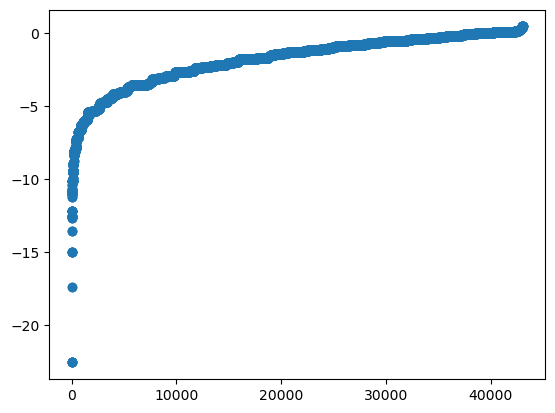

In [22]:
plt.scatter(x=final_df.index, y=final_df['Expected_Utils'])

In [34]:
# Above -1 util threshold

total_obs = len(final_df.loc[final_df['Expected_Utils'] > -2])
rbi_outcomes = final_df.loc[final_df['Expected_Utils'] > -2]['Rbi_steal_unique'].sum()
rbi_outcomes_stay = final_df.loc[final_df['Expected_Utils'] > -2]['Rbi_stay'].sum()
past_success_steal_prob = final_df.loc[final_df['Expected_Utils'] > -2]['Past_Steal_Success'].mean()

print(f'''Total Obs - {total_obs} with rbi outcomes - {rbi_outcomes} and prob of success of steal- {past_success_steal_prob} means that there is an  expected rbi return of {rbi_outcomes * past_success_steal_prob } this means you can expect a gain of {rbi_outcomes * past_success_steal_prob - rbi_outcomes_stay} RBis by choosing steal

With percentage of rbis gained per attempted steal - {rbi_outcomes * past_success_steal_prob / total_obs}''')


Total Obs - 27203 with rbi outcomes - 4081 and prob of success of steal- 0.795327721207225 means that there is an  expected rbi return of 3245.732430246685 this means you can expect a gain of 2453.732430246685 RBis by choosing steal

With percentage of rbis gained per attempted steal - 0.11931523840189262


In [35]:
# Less than -1 threshold

total_obs = len(final_df.loc[final_df['Expected_Utils'] < -2])

rbi_outcomes = final_df.loc[final_df['Expected_Utils'] < -2]['Rbi_steal_unique'].sum()
rbi_outcomes_stay = final_df.loc[final_df['Expected_Utils'] < -2]['Rbi_stay'].sum()
past_success_steal_prob = final_df.loc[final_df['Expected_Utils'] < -2]['Past_Steal_Success'].mean()

print(f'''Total Obs - {total_obs} with rbi outcomes - {rbi_outcomes} and prob of success of steal- {past_success_steal_prob} means that there is an  expected rbi return of {rbi_outcomes * past_success_steal_prob } this means you can expect a gain of {rbi_outcomes * past_success_steal_prob - rbi_outcomes_stay} RBis by choosing steal or by choosing to stay gain {rbi_outcomes_stay} rbis

With percentage of rbis gained per attempted steal - {rbi_outcomes * past_success_steal_prob / total_obs}''')


Total Obs - 15850 with rbi outcomes - 2259 and prob of success of steal- 0.6381451104101123 means that there is an  expected rbi return of 1441.5698044164437 this means you can expect a gain of 1018.5698044164437 RBis by choosing steal or by choosing to stay gain 423 rbis

With percentage of rbis gained per attempted steal - 0.09095077630387657
